In [11]:
!git clone https://github.com/marcalcarazf/realtime-2D-to-3D-faces.git


fatal: destination path 'realtime-2D-to-3D-faces' already exists and is not an empty directory.


In [12]:
%cd realtime-2D-to-3D-faces


/content/realtime-2D-to-3D-faces


In [13]:
!ls Use_Model



haarcascade_frontalface_alt2.xml  UseModelExample.py


In [14]:
!cat /content/realtime-2D-to-3D-faces/Use_Model/UseModelExample.py


import torch
import torch.nn as nn
import cv2
import numpy as np
from torchvision import datasets, models, transforms
import websocket
import ssl


################ Step 1 Load Resnet Model
print("Step 1 -- Loading Resnet Model")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting : 
        for param in model.parameters() : 
            param.requires_grad = False

## Dataload            
image_size = 224
data_transforms = {
    'val': transforms.Compose([
    	transforms.ToPILImage(),
        transforms.Resize((image_size,image_size)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

## Model Inicialize
model_ft = models.resnet152(pretrained = True)     
set_parameter_requires_grad(model_ft, False)
num_ftrs = model_ft.fc.in_features
num_classes = 25
model_ft.fc = nn.Linear(num_ftrs, num_classes)

# Load Weights
m

In [15]:
!pip install torch torchvision opencv-python numpy websocket-client


In [16]:
import torch
import torch.nn as nn
import cv2
import numpy as np
from torchvision import models, transforms
import websocket
import ssl


In [17]:
# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Function to freeze parameters
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

# Initialize model
print("Step 1 -- Loading ResNet Model")
model_ft = models.resnet152(pretrained=True)  # Load pretrained ResNet-152 model
set_parameter_requires_grad(model_ft, False)  # Freeze the layers for feature extraction

# Replace the final fully connected layer to match your custom number of classes
num_ftrs = model_ft.fc.in_features
num_classes = 25  # Number of output classes
model_ft.fc = nn.Linear(num_ftrs, num_classes)  # Update the final FC layer

# Move model to the device
model_ft = model_ft.to(device)
print("Step 1 -- ResNet Model Loaded")


Using device: cpu
Step 1 -- Loading ResNet Model


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Step 1 -- ResNet Model Loaded


In [18]:
# Define transformations for the input images
image_size = 224
data_transforms = transforms.Compose([
    transforms.ToPILImage(),  # Convert OpenCV image to PIL image
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize as per ResNet expectations
])


In [19]:
print("Step 2 -- Opening WebSocket Connection")

ws = websocket.WebSocket(sslopt={"cert_reqs": ssl.CERT_NONE})  # Ignore SSL certificate warnings
ws.connect("wss://tamats.com:55000/lgraph2")  # Update with your WebSocket server details

print("Step 2 -- WebSocket Connection Opened")


Step 2 -- Opening WebSocket Connection
Step 2 -- WebSocket Connection Opened


In [20]:
from google.colab import files
uploaded = files.upload()  # Upload an image file (e.g., .jpg, .png)


Saving images.jpg to images.jpg


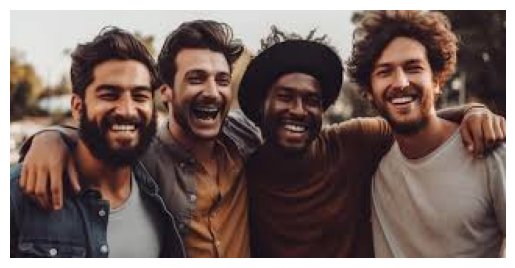

In [21]:
import cv2
from matplotlib import pyplot as plt

# Load the uploaded image
image_path = list(uploaded.keys())[0]  # Get the uploaded image file
img = cv2.imread(image_path)  # Read the image
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

# Display the image
plt.imshow(img_rgb)
plt.axis("off")
plt.show()


In [22]:
import numpy as np

# Convert the image to a NumPy array
# Replace 'image' with 'img' to use the loaded image
image_array = np.array(img)

# Check the shape of the image array
print(f"Image shape: {image_array.shape}")

Image shape: (159, 318, 3)


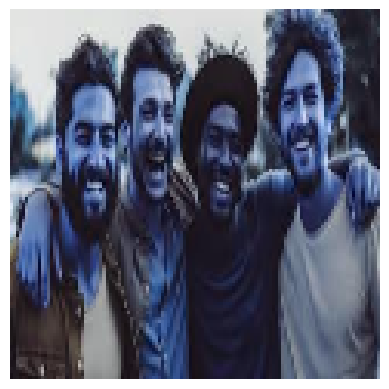

In [23]:
import cv2

# Resize the image to a fixed size (e.g., 120x120)
resized_image = cv2.resize(image_array, (120, 120))

# Display the resized image
plt.imshow(resized_image)
plt.axis("off")
plt.show()


In [24]:
# Normalize the image (scaling pixel values between 0 and 1)
normalized_image = resized_image / 255.0


In [25]:
import torch
from torchvision import transforms

# Define preprocessing transformations
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((120, 120)),  # Resize to the required model input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Apply preprocessing
input_tensor = preprocess(image_array)
input_tensor = input_tensor.unsqueeze(0)  # Add batch dimension


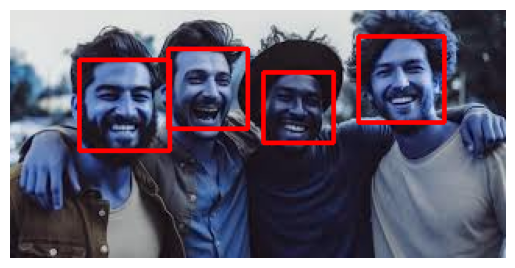

Detected 4 face(s)


In [26]:
# Load a pre-trained Haar Cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Convert image to grayscale (required by Haar Cascade)
gray_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw bounding boxes around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image_array, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the image with bounding boxes
plt.imshow(image_array)
plt.axis("off")
plt.show()

print(f"Detected {len(faces)} face(s)")


In [27]:
from PIL import Image # Import the Image class from the PIL library

# Save the processed image locally
output_path = "processed_image.jpg"
processed_image = Image.fromarray(image_array)
processed_image.save(output_path)

# Download the processed image
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>